**Introduction and Workspace setting**

We collected a valueble dataset just before the election from random street interviews in kaduwela Colombo area in Sri Lanka in order to predict the winnning presidential election candidate of Sri Lanka in 2019 polls and collected people's rationale behind their decision and try to come up with policies that the people think the winner should bring forward. In order to collect above date, we have prepared a questionnaire with 12 questions and offered them to randomly selected persons at public places. The participation to the survey was completely on their preference and there was no persuation to get the data from individuals. Other than to road interviews, we have done the same survey on social media with the same questions and collected those responses separately.

> Dataset contains,
> 1. Road interviews data (face_to_face_road_interviews.csv)
> 2. Social media data (social_media_votes.csv)

Please go to our [github repo](https://github.com/PraAnj/srilanka-election-prediction-2019) for more information. This repo contains the questionnaire and the dataset along with analysis scripts. This dataset is publicly available so that anyone can use it for academic work.

In [1]:
library(tidyverse) # metapackage with lots of helpful functions
library(dplyr)
library(ggplot2)

list.files(path = "../input/srilankanpresidentialelectionprediction2019")

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.2.1.9000     ✔ purrr   0.3.2     
✔ tibble  2.1.3          ✔ dplyr   0.8.3     
✔ tidyr   1.0.0          ✔ stringr 1.4.0     
✔ readr   1.3.1          ✔ forcats 0.4.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



[1] "face_to_face_road_interviews.csv" "social_media_votes.csv"

**Loading data**

In [2]:
columns <- c("timestamp", "firstVote", "secondVote", "policyInclination", "isExecutivePresidencyRequired", "2015vote", "age", "gender", "religion", "income", "ethnicity", "district", "education")

roadInterviews <- read.csv(file="../input/srilankanpresidentialelectionprediction2019/face_to_face_road_interviews.csv", header=TRUE, sep=",")
head(roadInterviews)

,timestamp,firstVote,secondVote,policyInclination,isExecutivePresidencyRequired,voteOf2015,age,gender,religion,income,ethnicity,district,education
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,2019/10/29 2:07:11 PM GMT+5:30,Gotabaya Rajapaksa,Gotabaya Rajapaksa,Corruption free/ less country,I do not care,Mahinda Rajapasa,55 to 64,Female,Buddhist,"Below 15,000",Sinhala,Kegalla,Primary
2,2019/10/29 2:11:07 PM GMT+5:30,Gotabaya Rajapaksa,Not voting,Economic stability,"Yes, we need an executive president",Mahinda Rajapasa,45 to 54,Female,Buddhist,"15,001 to 30,000",Sinhala,,Ordinary level (O/L)
3,2019/10/29 2:13:14 PM GMT+5:30,Gotabaya Rajapaksa,Not voting,Economic stability,"Yes, we need an executive president",I did not vote,35 to 44,Female,Buddhist,"30,001 to 50,000",Sinhala,"homagama, colombo",Graduated
4,2019/10/29 2:15:40 PM GMT+5:30,Sajith Premadasa,Gotabaya Rajapaksa,Economic stability,"Yes, we need an executive president",Maithreepala Sirisena,35 to 44,Male,Buddhist,"30,001 to 50,000",Sinhala,"kaduwela, colombo",Advanced level (A/L)
5,2019/10/29 2:17:10 PM GMT+5:30,Anura Kumara Dissanayake,Not voting,Economic stability,"No, executive presidency should be removed.",Other,55 to 64,Male,Buddhist,"30,001 to 50,000",Sinhala,Kaduwela,Ordinary level (O/L)
6,2019/10/29 2:21:31 PM GMT+5:30,Gotabaya Rajapaksa,Not voting,National security,"Yes, we need an executive president",Mahinda Rajapasa,35 to 44,Female,Buddhist,"Below 15,000",Sinhala,"kaduwela, colombo",Ordinary level (O/L)


**Visualizing collected data**

Pie chart guide is available [here](https://www.displayr.com/how-to-make-a-pie-chart-in-r/).

In [3]:
drawPieChartForCategorical <- function(df, colName, titleName)
{
    names(df)[1] <- "categoricalVar"
    df$n <- df$n*100/sum(df$n)   # convert count to percentage

    # Create a basic bar
    pie = ggplot(df, aes(x="", y=n, fill=categoricalVar)) + geom_bar(stat="identity", width=1)

    # Convert to pie (polar coordinates) and add labels
    pie = pie + coord_polar("y", start=0) + geom_text(aes(label = paste0(round(n), "%")), position = position_stack(vjust = 0.5))

    # Remove labels and add title
    pie = pie + labs(x = NULL, y = NULL, fill = NULL, title = titleName)

    # Tidy up the theme
    pie = pie + theme_classic() + theme(axis.line = element_blank(),
              axis.text = element_blank(),
              axis.ticks = element_blank(),
              plot.title = element_text(hjust = 0.5))
    return(pie)
}

In [4]:
# Increase the figure size
options(repr.plot.width=8, repr.plot.height=8)

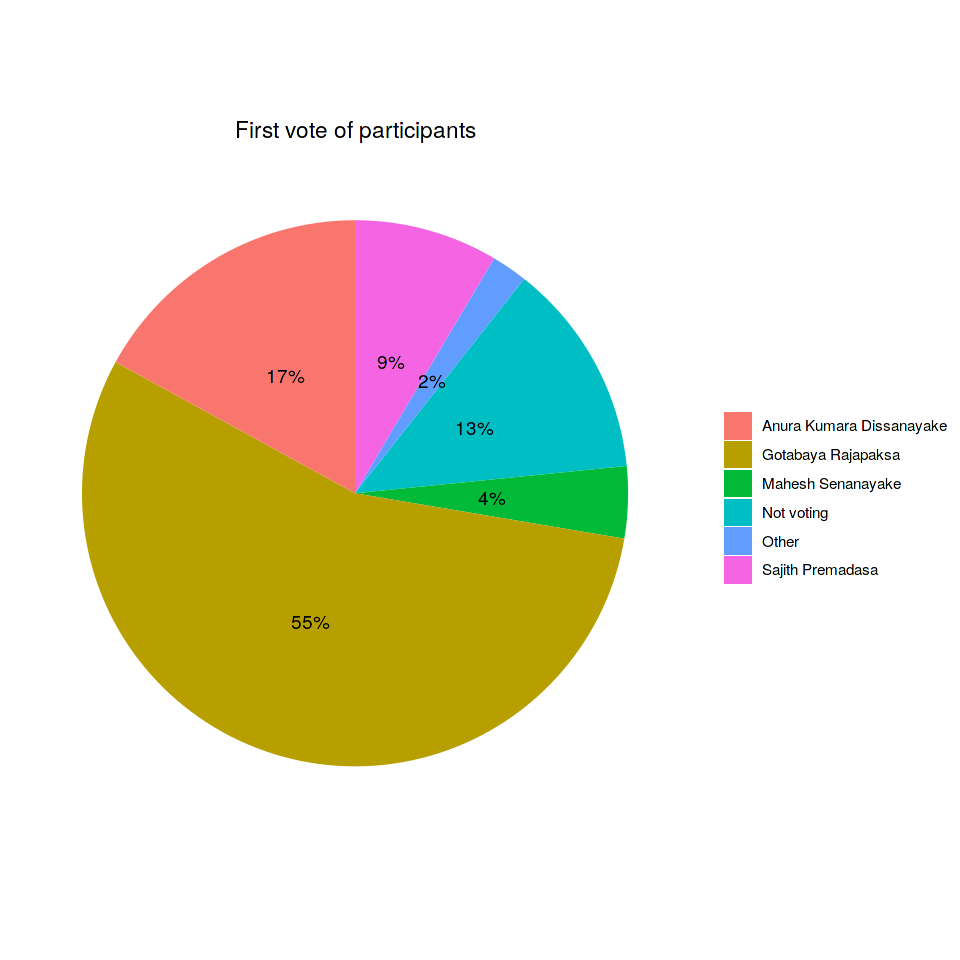

In [5]:
drawPieChartForCategorical(count(roadInterviews, firstVote), 'firstVote', 'First vote of participants')
# drawPieChartForCategorical(count(roadInterviews, education), "education", "Education distribution of participants")
# drawPieChartForCategorical(count(roadInterviews, policyInclination), 'policyInclination', 'policyInclination of participants')
# drawPieChartForCategorical(count(roadInterviews, isExecutivePresidencyRequired), 'isExecutivePresidencyRequired', 'Precidency requirement of participants')
# drawPieChartForCategorical(count(roadInterviews, voteOf2015), 'voteOf2015', '2015 vote of participants')
# drawPieChartForCategorical(count(roadInterviews, age), 'age', 'Age range of participants')
# drawPieChartForCategorical(count(roadInterviews, gender), 'gender', 'Gender of participants')
# drawPieChartForCategorical(count(roadInterviews, religion), 'religion', 'Religion of participants')
# drawPieChartForCategorical(count(roadInterviews, income), 'income', 'Income of participants')
# drawPieChartForCategorical(count(roadInterviews, ethnicity), 'ethnicity', 'Ethnicity of participants')
# drawPieChartForCategorical(count(roadInterviews, education), 'education', 'Education of participants')

**Election winner prediction using kaduwela participants**

Following data is taken from [election results website of srilanka](https://elections.gov.lk/web/en/elections/elections-results/presidential-elections-results/).

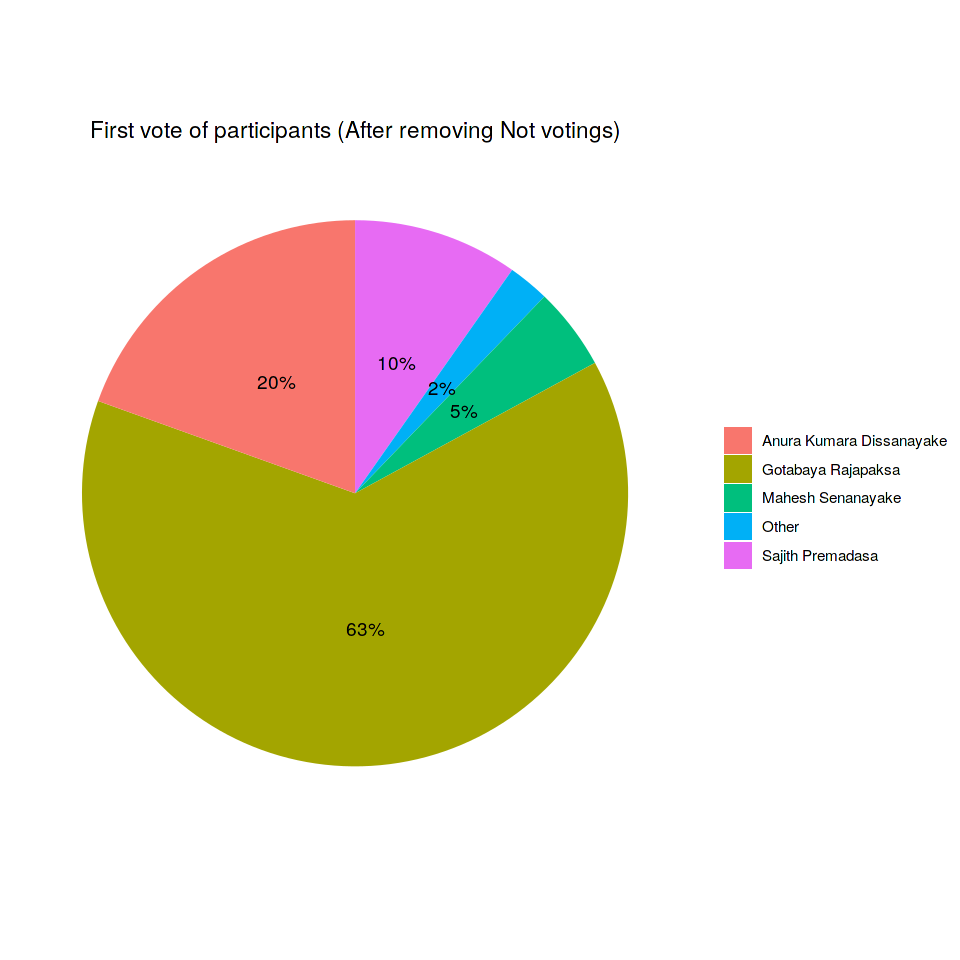

In [6]:

drawPieChartForCategorical(count(roadInterviews[roadInterviews$firstVote != "Not voting", ], firstVote), 'firstVote', 'First vote of participants (After removing Not votings)')

In [7]:
# UNP, SLPP
election2005 <- c(48.43, 50.29)
kaduwela2005 <- c(41.32, 57.84)
colomboD2005 <- c(51.12, 47.96)

election2010 <- c(40.15, 57.88)
kaduwela2010 <- c(36.87, 62.24)
colomboD2010 <- c(45.90, 52.93)

election2015 <- c(51.28, 47.58)
kaduwela2015 <- c(48.98, 50.46)
colomboD2015 <- c(55.93, 43.40)

kaduwela2019 <- c(35.00, 63.00)

allIslandUNP <- c(40.15, 51.28)
allIslandSLPP <- c(57.88, 47.58)

In [8]:
mat = matrix( 
   c(48.43, 50.29, 41.32, 57.84, 51.12, 47.96, 40.15, 57.88, 36.87, 62.24, 45.90, 52.93, 51.28, 47.58, 48.98, 50.46, 55.93, 43.40, 39.0, 58.5, 35.00, 63.00, 45.0, 53.4),
   nrow=4,              # number of rows 
   ncol=6,              # number of columns 
   byrow = TRUE)

mat

48.43,50.29,41.32,57.84,51.12,47.96
40.15,57.88,36.87,62.24,45.90,52.93
51.28,47.58,48.98,50.46,55.93,43.40
39.00,58.50,35.00,63.00,45.00,53.40


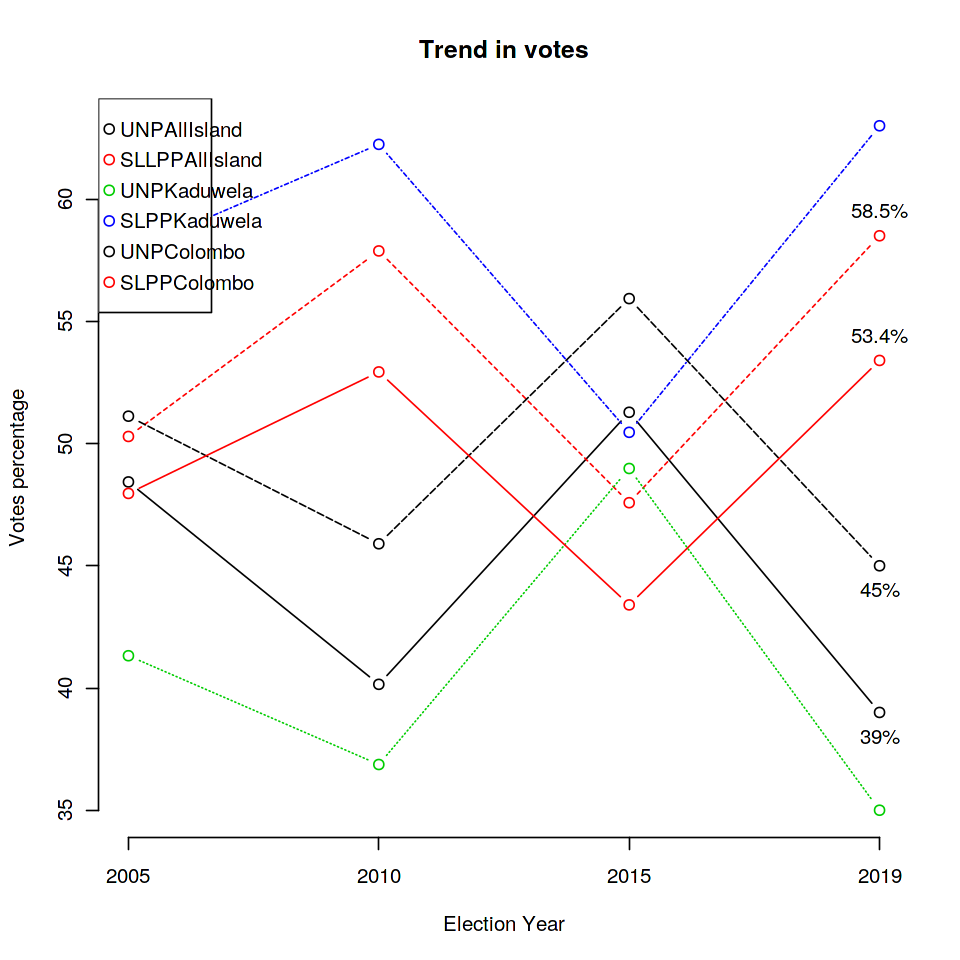

In [9]:
matplot(mat, type = c("b"),pch=1,col = 1:4, lwd=1,xlab="Election Year",ylab="Votes percentage",main="Trend in votes",axes=F) #plot
axis(2)
axis(side=1,at=1:4,labels=c("2005", "2010","2015", "2019"))
legend("topleft", legend = c("UNPAllIsland", "SLLPPAllIsland", "UNPKaduwela", "SLPPKaduwela", "UNPColombo", "SLPPColombo") , col=1:4, pch=1)

text(4, 38.0, "39%")     ## UNP all island prediction (Includes JVP & Mahesh)
text(4, 59.5, "58.5%")   ## SLPP all island prediction
text(4, 44.0, "45%")     ## UNP Colombo prediction (Includes JVP & Mahesh)
text(4, 54.4, "53.4%")   ## SLPP Colombo prediction